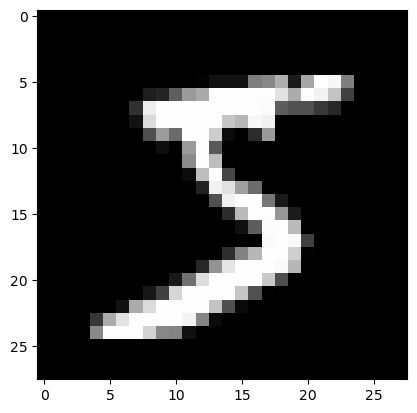

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


# Reading The Train Set
train_images_file = open('train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))


# Reading The Test Set
test_images_file = open('t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))


# Plotting an image
show_image(train_set[0][0])
plt.show()
train_set[0][1]

In [2]:
import math

def sigmoid(vector):
    x = np.zeros((len(vector), 1))
    for i in range(len(vector)):
        x[i][0] = 1 / (1 + math.exp(-vector[i][0]))
    return x

v = [[1],
     [6],
     [0],
     [-5],
     [9]]

sigmoid(v)

array([[0.73105858],
       [0.99752738],
       [0.5       ],
       [0.00669285],
       [0.99987661]])

In [3]:
nRecognizedCorrectly = 0
for i in range(100):
    w1 = np.random.standard_normal((16, 784))
    w2 = np.random.standard_normal((16, 16))
    w3 = np.random.standard_normal((10, 16))
    
    b1 = np.zeros((16, 1))
    b2 = np.zeros((16, 1))
    b3 = np.zeros((10, 1))
    
    a0 = train_set[i][0]
    a1 = sigmoid(np.matmul(w1, a0) + b1)
    a2 = sigmoid(np.matmul(w2, a1) + b2)
    a3 = sigmoid(np.matmul(w3, a2) + b3)
    
    output = np.argmax(a3)
    label = np.argmax(train_set[i][1])
    
    if output == label: nRecognizedCorrectly += 1
nRecognizedCorrectly/100

0.15

In [4]:
def d_sigmoid(vector):
    x = np.zeros((len(vector), 1))
    for i in range(len(vector)):
        x[i][0] = (1 / (1 + math.exp(-vector[i][0]))) * (1 - (1 / (1 + math.exp(-vector[i][0]))))
    return x

v = [[1],
     [6],
     [0],
     [-5],
     [9]]

d_sigmoid(v)

array([[1.96611933e-01],
       [2.46650929e-03],
       [2.50000000e-01],
       [6.64805667e-03],
       [1.23379350e-04]])

epoch 0: 0.11
epoch 1: 0.18
epoch 2: 0.26
epoch 3: 0.24
epoch 4: 0.26
epoch 5: 0.33
epoch 6: 0.35
epoch 7: 0.4
epoch 8: 0.42
epoch 9: 0.45
epoch 10: 0.43
epoch 11: 0.43
epoch 12: 0.48
epoch 13: 0.47
epoch 14: 0.51
epoch 15: 0.51
epoch 16: 0.55
epoch 17: 0.55
epoch 18: 0.55
epoch 19: 0.57


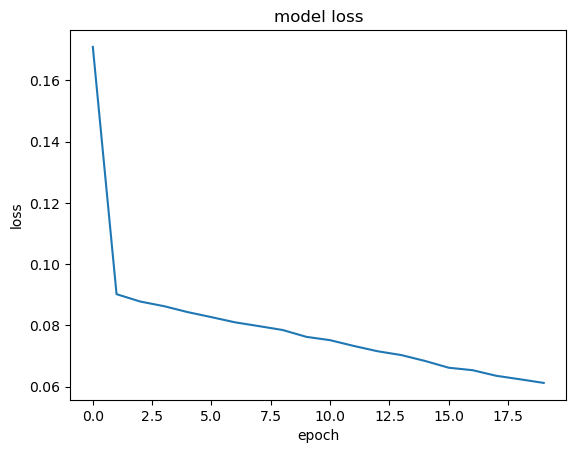

Wall time: 9min 17s


In [5]:
%%time

w1 = np.random.standard_normal((16, 784))
w2 = np.random.standard_normal((16, 16))
w3 = np.random.standard_normal((10, 16))
    
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((10, 1))

batch_size = 10
learning_rate = 1
epoch = 20

averageCostEpochs = []
for e in range(epoch):
    myTrainSetRandomIndex = list(range(100))
    np.random.shuffle(myTrainSetRandomIndex)
    
    nRecognizedCorrectly = 0
    index = 0
    sumCost = 0
    for batch in range(int(100/batch_size)):
        grad_w1 = np.zeros((16, 784))
        grad_w2 = np.zeros((16, 16))
        grad_w3 = np.zeros((10, 16))
        
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((10, 1))
        for image in range(batch_size):
            currentImageIndex = myTrainSetRandomIndex[index]
            
            a0 = train_set[myTrainSetRandomIndex[index]][0]
            a1 = sigmoid(np.matmul(w1, a0) + b1)
            a2 = sigmoid(np.matmul(w2, a1) + b2)
            a3 = sigmoid(np.matmul(w3, a2) + b3)
            
            output = np.argmax(a3)
            label = np.argmax(train_set[currentImageIndex][1])
            if output == label: nRecognizedCorrectly += 1
            
            for o in range(10):
                sumCost += (a3[o][0] - train_set[currentImageIndex][1][o][0]) ** 2
            
            d_w3 = np.zeros((10, 16))
            for j in range(10):
                for k in range(16):
                    d_w3[j][k] = (2*(a3[j][0] - train_set[currentImageIndex][1][j][0])
                    * d_sigmoid(np.matmul(w3, a2) + b3)[j][0] * a2[k][0])
            
            d_b3 = np.zeros((10, 1))
            for j in range(10):
                d_b3[j][0] = (2*(a3[j][0] - train_set[currentImageIndex][1][j][0])
                * d_sigmoid(np.matmul(w3, a2) + b3)[j][0])
            
            d_a2 = np.zeros((16, 1))
            for k in range(16):
                for j in range(10):
                    d_a2[k][0] += (2*(a3[j][0] - train_set[currentImageIndex][1][j][0])
                    * d_sigmoid(np.matmul(w3, a2) + b3)[j][0] * w3[j][k])
            
            d_w2 = np.zeros((16, 16))
            for k in range(16):
                for m in range(16):
                    d_w2[k][m] = (d_a2[k][0] * d_sigmoid(np.matmul(w2, a1) + b2)[k][0] * a1[m][0])
                    
            d_b2 = np.zeros((16, 1))
            for k in range(16):
                d_b2[k][0] = (d_a2[k][0] * d_sigmoid(np.matmul(w2, a1) + b2)[k][0])
                
            d_a1 = np.zeros((16, 1))
            for m in range(16):
                for k in range(16):
                    d_a1[m][0] += (d_a2[k][0] * d_sigmoid(np.matmul(w2, a1) + b2)[k][0] * w2[k][m])
            
            d_w1 = np.zeros((16, 784))
            for m in range(16):
                for v in range(784):
                    d_w1[m][v] = (d_a1[m][0] * d_sigmoid(np.matmul(w1, a0) + b1)[m][0] * a0[v][0])
            
            d_b1 = np.zeros((16, 1))
            for m in range(16):
                d_b1[m][0] = (d_a1[m][0] * d_sigmoid(np.matmul(w1, a0) + b1)[m][0])
            
            grad_w1 += d_w1
            grad_w2 += d_w2
            grad_w3 += d_w3
            
            grad_b1 += d_b1
            grad_b2 += d_b2
            grad_b3 += d_b3
            
            index += 1
        w1 -= learning_rate * grad_w1 / batch_size
        w2 -= learning_rate * grad_w2 / batch_size
        w3 -= learning_rate * grad_w3 / batch_size
        
        b1 -= learning_rate * grad_b1 / batch_size
        b2 -= learning_rate * grad_b2 / batch_size
        b3 -= learning_rate * grad_b3 / batch_size
    averageCostEpochs.append(sumCost/1000)
    
    print("epoch " + str(e) + ": " + str(nRecognizedCorrectly/100))
%matplotlib inline
x = np.arange(0, epoch, 1)
y = averageCostEpochs.copy()
plt.plot(x, y)
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

epoch 0: 0.11
epoch 1: 0.16
epoch 2: 0.26
epoch 3: 0.3
epoch 4: 0.29
epoch 5: 0.29
epoch 6: 0.34
epoch 7: 0.32
epoch 8: 0.41
epoch 9: 0.39
epoch 10: 0.44
epoch 11: 0.43
epoch 12: 0.45
epoch 13: 0.5
epoch 14: 0.5
epoch 15: 0.55
epoch 16: 0.58
epoch 17: 0.58
epoch 18: 0.62
epoch 19: 0.62
epoch 20: 0.63
epoch 21: 0.68
epoch 22: 0.68
epoch 23: 0.69
epoch 24: 0.73
epoch 25: 0.73
epoch 26: 0.75
epoch 27: 0.75
epoch 28: 0.77
epoch 29: 0.78
epoch 30: 0.77
epoch 31: 0.78
epoch 32: 0.77
epoch 33: 0.8
epoch 34: 0.79
epoch 35: 0.79
epoch 36: 0.79
epoch 37: 0.8
epoch 38: 0.81
epoch 39: 0.81
epoch 40: 0.81
epoch 41: 0.81
epoch 42: 0.81
epoch 43: 0.81
epoch 44: 0.81
epoch 45: 0.81
epoch 46: 0.81
epoch 47: 0.81
epoch 48: 0.81
epoch 49: 0.81
epoch 50: 0.81
epoch 51: 0.81
epoch 52: 0.81
epoch 53: 0.81
epoch 54: 0.81
epoch 55: 0.81
epoch 56: 0.82
epoch 57: 0.81
epoch 58: 0.83
epoch 59: 0.83
epoch 60: 0.84
epoch 61: 0.85
epoch 62: 0.88
epoch 63: 0.87
epoch 64: 0.88
epoch 65: 0.88
epoch 66: 0.89
epoch 67: 

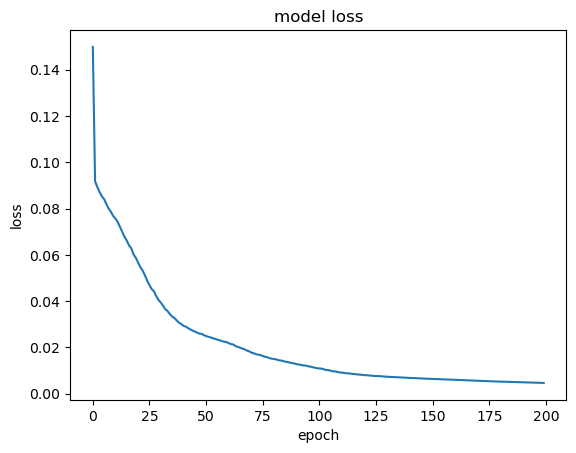

Wall time: 5.15 s


In [6]:
%%time

w1 = np.random.standard_normal((16, 784))
w2 = np.random.standard_normal((16, 16))
w3 = np.random.standard_normal((10, 16))
    
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((10, 1))

batch_size = 10
learning_rate = 1
epoch = 200

averageCostEpochs = []
for e in range(epoch):
    myTrainSetRandomIndex = list(range(100))
    np.random.shuffle(myTrainSetRandomIndex)
    
    nRecognizedCorrectly = 0
    index = 0
    sumCost = 0
    for batch in range(int(100/batch_size)):
        grad_w1 = np.zeros((16, 784))
        grad_w2 = np.zeros((16, 16))
        grad_w3 = np.zeros((10, 16))
        
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((10, 1))
        for image in range(batch_size):
            currentImageIndex = myTrainSetRandomIndex[index]
            
            a0 = train_set[myTrainSetRandomIndex[index]][0]
            a1 = sigmoid(np.matmul(w1, a0) + b1)
            a2 = sigmoid(np.matmul(w2, a1) + b2)
            a3 = sigmoid(np.matmul(w3, a2) + b3)
            
            output = np.argmax(a3)
            label = np.argmax(train_set[currentImageIndex][1])
            if output == label: nRecognizedCorrectly += 1
            
            for o in range(10):
                sumCost += (a3[o][0] - train_set[currentImageIndex][1][o][0]) ** 2
            
            d_w3 = np.zeros((10, 16))
            d_w3 = (2 * d_sigmoid(np.matmul(w3, a2) + b3) * (a3 - train_set[currentImageIndex][1])) @ np.transpose(a2)
            
            d_b3 = np.zeros((10, 1))
            d_b3 = (2 * d_sigmoid(np.matmul(w3, a2) + b3) * (a3 - train_set[currentImageIndex][1]))
            
            d_a2 = np.zeros((16, 1))                    
            d_a2 = np.transpose(w3) @ (2 * d_sigmoid(np.matmul(w3, a2) + b3) * (a3 - train_set[currentImageIndex][1]))
            
            
            d_w2 = np.zeros((16, 16))
            d_w2 = (d_sigmoid(np.matmul(w2, a1) + b2) * d_a2) @ np.transpose(a1)
                    
            d_b2 = np.zeros((16, 1))
            d_b2 = d_sigmoid(np.matmul(w2, a1) + b2) * d_a2
                
            d_a1 = np.zeros((16, 1))
            d_a1 = np.transpose(w2) @ ((d_sigmoid(np.matmul(w2, a1) + b2) * d_a2))
            
            d_w1 = np.zeros((16, 784))
            d_w1 = (d_sigmoid(np.matmul(w1, a0) + b1) * d_a1) @ np.transpose(a0)
            
            d_b1 = np.zeros((16, 1))
            d_b1 = d_sigmoid(np.matmul(w1, a0) + b1) * d_a1
            
            grad_w1 += d_w1
            grad_w2 += d_w2
            grad_w3 += d_w3
            
            grad_b1 += d_b1
            grad_b2 += d_b2
            grad_b3 += d_b3
            
            index += 1
        w1 -= learning_rate * grad_w1 / batch_size
        w2 -= learning_rate * grad_w2 / batch_size
        w3 -= learning_rate * grad_w3 / batch_size
        
        b1 -= learning_rate * grad_b1 / batch_size
        b2 -= learning_rate * grad_b2 / batch_size
        b3 -= learning_rate * grad_b3 / batch_size
    averageCostEpochs.append(sumCost/1000)
    
    print("epoch " + str(e) + ": " + str(nRecognizedCorrectly/100))
%matplotlib inline
x = np.arange(0, epoch, 1)
y = averageCostEpochs.copy()
plt.plot(x, y)
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

epoch 0: 0.5632833333333334
epoch 1: 0.82715
epoch 2: 0.87265
epoch 3: 0.89145
epoch 4: 0.9020333333333334


Text(0.5, 1.0, 'model loss')

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

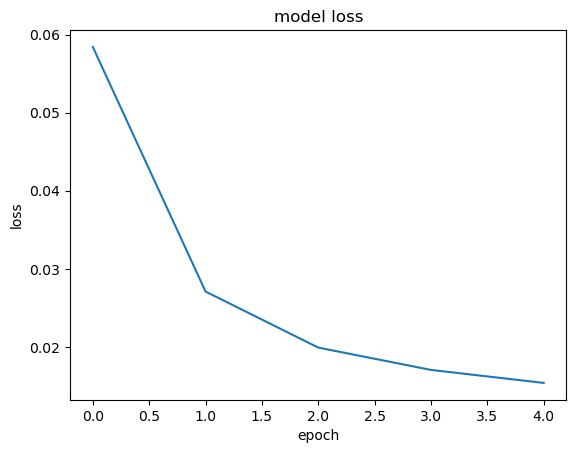

In [7]:
w1 = np.random.standard_normal((16, 784))
w2 = np.random.standard_normal((16, 16))
w3 = np.random.standard_normal((10, 16))
    
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((10, 1))

batch_size = 50
learning_rate = 1
epoch = 5

averageCostEpochs = []
for e in range(epoch):
    myTrainSetRandomIndex = list(range(60000))
    np.random.shuffle(myTrainSetRandomIndex)
    
    nRecognizedCorrectly = 0
    index = 0
    sumCost = 0
    for batch in range(int(60000/batch_size)):
        grad_w1 = np.zeros((16, 784))
        grad_w2 = np.zeros((16, 16))
        grad_w3 = np.zeros((10, 16))
        
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((10, 1))
        for image in range(batch_size):
            currentImageIndex = myTrainSetRandomIndex[index]
            
            a0 = train_set[myTrainSetRandomIndex[index]][0]
            a1 = sigmoid(np.matmul(w1, a0) + b1)
            a2 = sigmoid(np.matmul(w2, a1) + b2)
            a3 = sigmoid(np.matmul(w3, a2) + b3)
            
            output = np.argmax(a3)
            label = np.argmax(train_set[currentImageIndex][1])
            if output == label: nRecognizedCorrectly += 1
            
            for o in range(10):
                sumCost += (a3[o][0] - train_set[currentImageIndex][1][o][0]) ** 2
            
            d_w3 = np.zeros((10, 16))
            d_w3 = (2 * d_sigmoid(np.matmul(w3, a2) + b3) * (a3 - train_set[currentImageIndex][1])) @ np.transpose(a2)
            
            d_b3 = np.zeros((10, 1))
            d_b3 = (2 * d_sigmoid(np.matmul(w3, a2) + b3) * (a3 - train_set[currentImageIndex][1]))
            
            d_a2 = np.zeros((16, 1))                    
            d_a2 = np.transpose(w3) @ (2 * d_sigmoid(np.matmul(w3, a2) + b3) * (a3 - train_set[currentImageIndex][1]))
            
            
            d_w2 = np.zeros((16, 16))
            d_w2 = (d_sigmoid(np.matmul(w2, a1) + b2) * d_a2) @ np.transpose(a1)
                    
            d_b2 = np.zeros((16, 1))
            d_b2 = d_sigmoid(np.matmul(w2, a1) + b2) * d_a2
                
            d_a1 = np.zeros((16, 1))
            d_a1 = np.transpose(w2) @ ((d_sigmoid(np.matmul(w2, a1) + b2) * d_a2))
            
            d_w1 = np.zeros((16, 784))
            d_w1 = (d_sigmoid(np.matmul(w1, a0) + b1) * d_a1) @ np.transpose(a0)
            
            d_b1 = np.zeros((16, 1))
            d_b1 = d_sigmoid(np.matmul(w1, a0) + b1) * d_a1
            
            grad_w1 += d_w1
            grad_w2 += d_w2
            grad_w3 += d_w3
            
            grad_b1 += d_b1
            grad_b2 += d_b2
            grad_b3 += d_b3
            
            index += 1
        w1 -= learning_rate * grad_w1 / batch_size
        w2 -= learning_rate * grad_w2 / batch_size
        w3 -= learning_rate * grad_w3 / batch_size
        
        b1 -= learning_rate * grad_b1 / batch_size
        b2 -= learning_rate * grad_b2 / batch_size
        b3 -= learning_rate * grad_b3 / batch_size
    averageCostEpochs.append(sumCost/600000)
    
    print("epoch " + str(e) + ": " + str(nRecognizedCorrectly/60000))
%matplotlib inline
x = np.arange(0, epoch, 1)
y = averageCostEpochs.copy()
plt.plot(x, y)
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [8]:
nRecognizedCorrectly = 0
for i in range(10000):
    a0 = test_set[i][0]
    a1 = sigmoid(np.matmul(w1, a0) + b1)
    a2 = sigmoid(np.matmul(w2, a1) + b2)
    a3 = sigmoid(np.matmul(w3, a2) + b3)
    
    output = np.argmax(a3)
    label = np.argmax(test_set[i][1])
    
    if output == label: nRecognizedCorrectly += 1
nRecognizedCorrectly/10000

0.907